In [1]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import
import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd
import numpy as np
import itertools as iter

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import pickle

In [3]:
#initialize the datasets
dataset = pd.read_csv('Datasets/fake_or_real_news.csv')
x = dataset['text']
y = dataset['label']

In [4]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#dataset shape: no. of rows and no. of col.
dataset.shape

(6335, 4)

In [7]:
#Print real colm
print(dataset.label[dataset.label=="REAL"])

2       REAL
4       REAL
7       REAL
8       REAL
9       REAL
        ... 
6324    REAL
6327    REAL
6330    REAL
6333    REAL
6334    REAL
Name: label, Length: 3171, dtype: object


In [8]:
#Print fake colm.
print(dataset.label[dataset.label=="FAKE"])

0       FAKE
1       FAKE
3       FAKE
5       FAKE
6       FAKE
        ... 
6326    FAKE
6328    FAKE
6329    FAKE
6331    FAKE
6332    FAKE
Name: label, Length: 3164, dtype: object


In [9]:
#clean data
#checking nul values
dataset.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
#Creating a pipeline that first creates bag of words(after applying stopwords) & then applies Multinomial Naive Bayes model
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])


In [12]:
#Training our data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [13]:
#Predicting the label for the test data
pred = pipeline.predict(x_test)

In [14]:
# Score: Accuracy
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.98%


In [15]:
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [16]:
# Passive Aggressive Classification
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
pac_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(pac_score*100,2)}%')

Accuracy: 93.84%


In [17]:
#print classifiaction report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.98      0.70      0.81       636
        REAL       0.76      0.98      0.86       631

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



In [18]:
#print confusion matrix
print(confusion_matrix(y_test, pred))

[[444 192]
 [ 11 620]]


<Axes: >

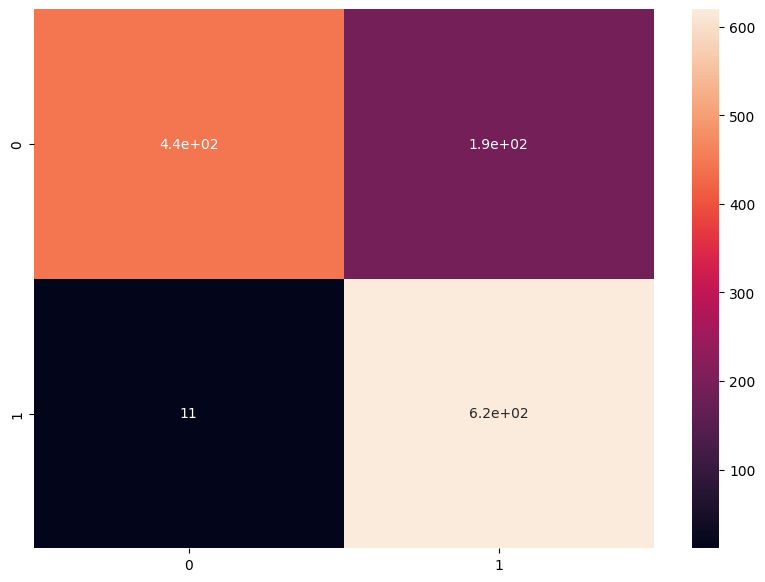

In [19]:
#plot heat map 
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, pred), annot=True)